<a href="https://colab.research.google.com/github/bridgetmanu/QDA_LDA_KNN/blob/main/Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from scipy.stats import multivariate_normal
from sklearn.preprocessing import StandardScaler


# Set random seed for reproducibility
np.random.seed(1)

In [86]:
# Data preprocessing

# load the data
forest = pd.read_csv('/content/drive/MyDrive/forestfires.csv')
before = forest.head()

# log transformation
copy = forest.copy()
copy['area'] = copy['area'].replace(0, 1)
copy['area'] = np.log(copy['area'])

after = copy.head()
print(before)


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


a. Exploratory Data analysis

       DMC     DC   ISI  temp  RH  wind  rain      area
148  108.3  647.1  17.0  17.4  43   6.7   0.0  0.067659
149   80.9  685.2  17.9  23.7  25   4.5   0.0  0.113329
150   56.4  433.3   7.1  23.2  39   5.4   0.0  0.173953
151   68.6  355.2   7.2  24.8  29   2.2   0.0  0.307485
152   51.2  424.1   6.2  24.6  43   1.8   0.0  0.357674


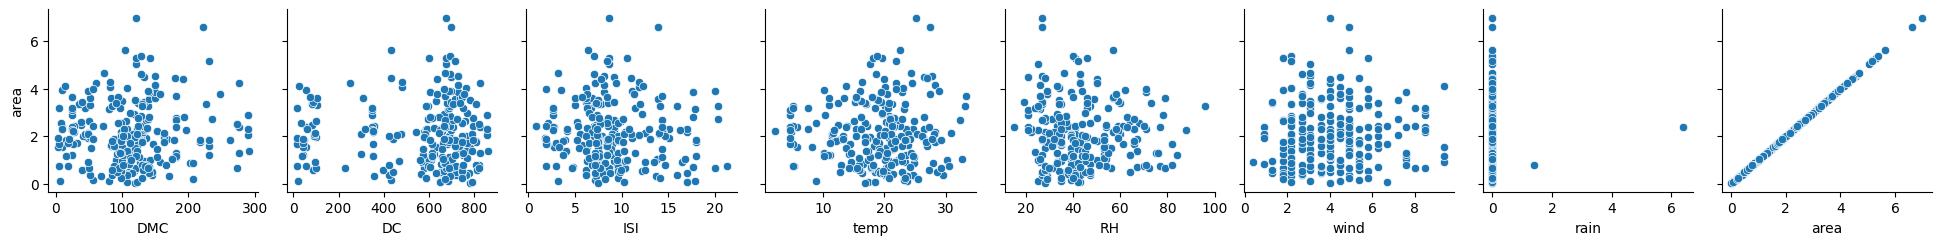

DMC     0.040161
DC     -0.011872
ISI    -0.052972
temp    0.022695
RH     -0.053579
wind    0.051616
rain   -0.001165
area    1.000000
Name: area, dtype: float64


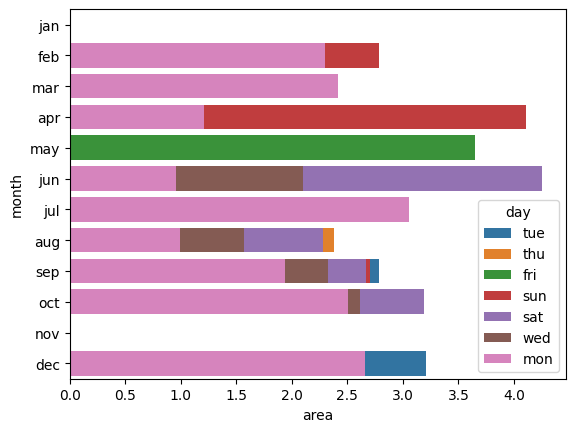

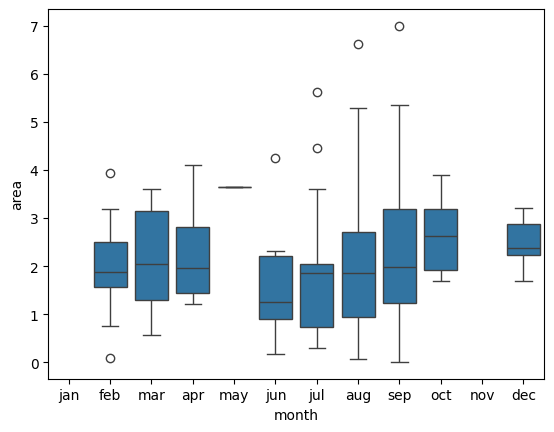

In [87]:
# create a subset with just the continuous variables
copy_subset = copy.iloc[:, -8:]
copy_subset = copy_subset[copy_subset['area'] > 0]
print(copy_subset.head())

# create scatterplots for all quantitative data
q = sns.PairGrid(copy_subset, y_vars=['area'])
q.map(sns.scatterplot)
plt.show()

# correlation of copy_subset with area
corr = copy_subset.corr()
area_corr = corr['area']
print(area_corr)

# create a subset with just the categorical variables
copy_subset2 = copy[['month','day','area']]
copy_subset2 = copy_subset2[copy_subset2['area'] > 0]
copy_subset2.head()

# create barplots for all categorical data
ord = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
w = sns.barplot(x='area', y='month', data=copy_subset2, errorbar=None,
            hue='day', dodge=False, order=ord, orient="h")
plt.show()

sns.boxplot(x='month', y='area', data=copy_subset2, order=ord)
plt.show()





In [88]:
# 15a: fit a simple linear regression model to predict the response

#15b: it a multiple regression model to predict the response using all of the predictors

## 2: Diabetes Dataset

In [89]:


dtrain = pd.read_csv('/content/drive/MyDrive/diabetes_train.csv')

# make Outcome into categorical data
dtrain['Outcome'] = dtrain['Outcome'].astype('category')
print(dtrain.head())

# selects all excluding outcome variable
dtrain_p = dtrain.iloc[:, :-1]

# selects only outcome variable
dtrain_out = dtrain.iloc[:, -1]

# standardize the predictors
sd = StandardScaler()
dtrain_p= sd.fit_transform(dtrain_p)
d_train = pd.DataFrame(dtrain_p, columns=dtrain.columns[:-1])
d_train['Outcome'] = dtrain_out
print(d_train.head())


dtest = pd.read_csv('/content/drive/MyDrive/diabetes_test.csv')

# selects all excluding outcome variable
dtest_p = dtest.iloc[:, :-1]

# standardize the predictors
dtest_p = sd.fit_transform(dtest_p)

# selects only outcome variable
dtest_out = dtest.iloc[:, -1]

# make into dataframe
dtest = pd.DataFrame(dtest_p, columns=dtest.columns[:-1])
dtest['Outcome'] = dtest_out

# make Outcome into categorical data
dtest['Outcome'] = dtest['Outcome'].astype('category')
print(dtest.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            1       89             66             23       94  28.1   
3            0      137             40             35      168  43.1   
4            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.167   21       0  
3                     2.288   33       1  
4                     0.201   30       0  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.656704  0.871364       0.154423       0.910797 -0.683127  0.215039   
1    -0.844579 -1.132137      -0.145844       0.536313 -0.683127 -0.674453   
2    -0.844579 -1.004930      -0.145844       0.161830  0.133592 -0.483848 

#### a: exploratory data analysis

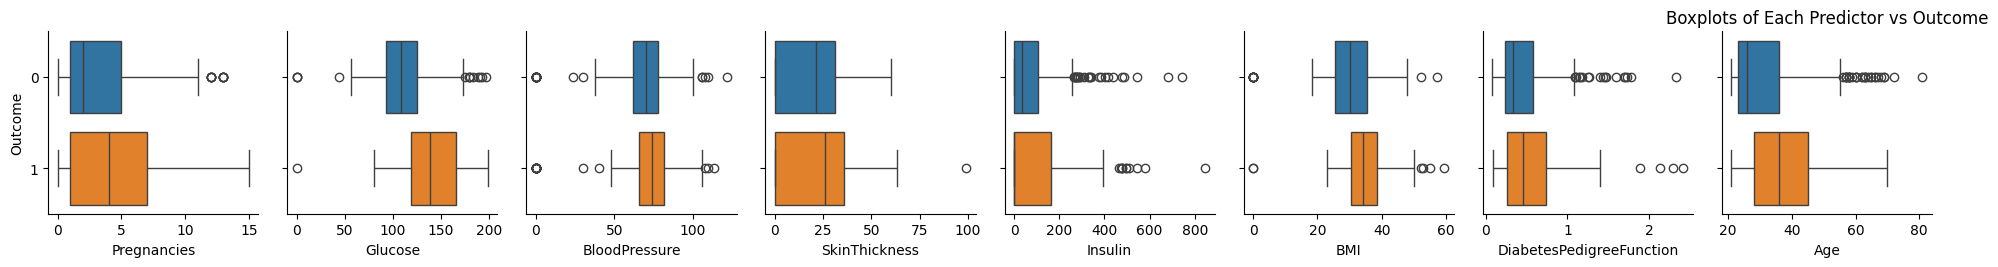

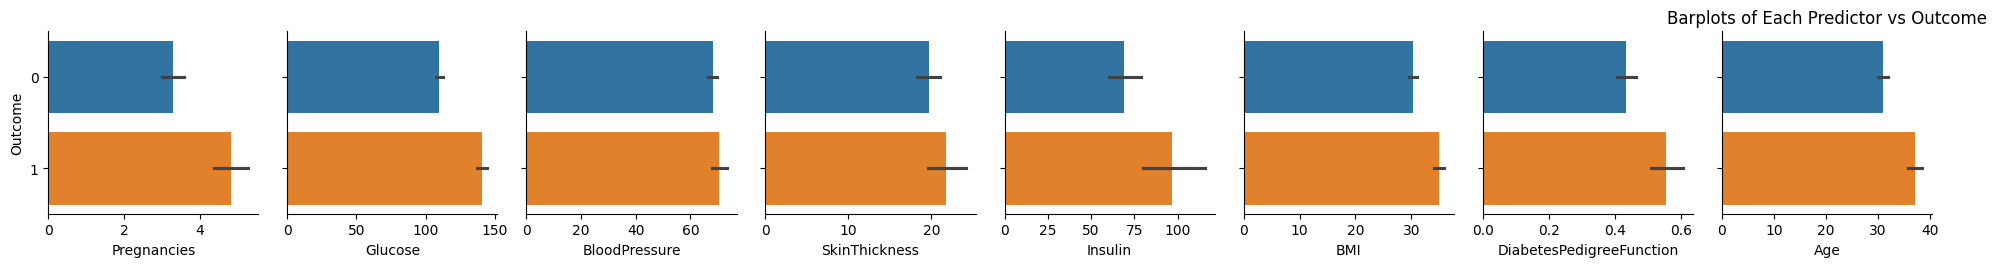

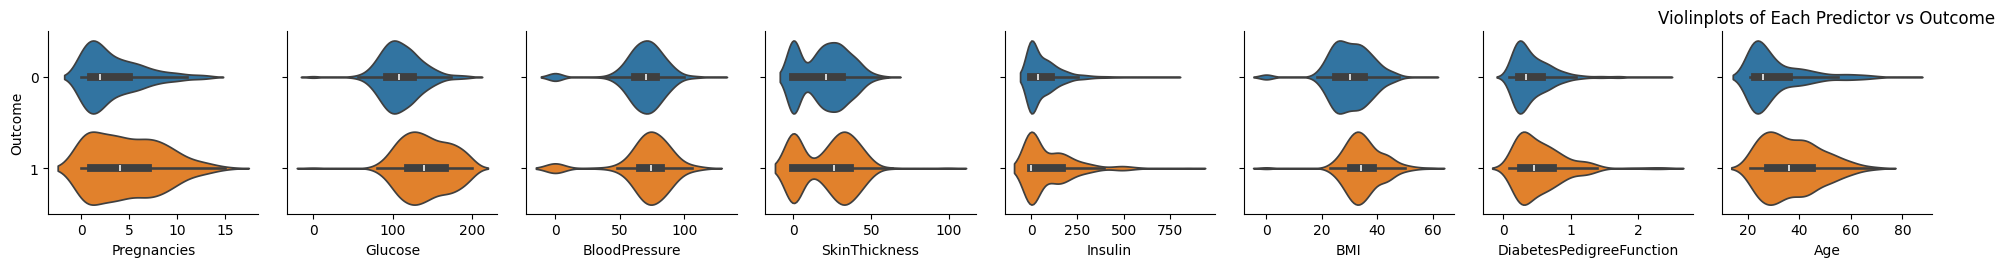

In [90]:
# boxplots to visualize the relationship between the predictors and outcome
sns.PairGrid(dtrain, y_vars=['Outcome'], hue='Outcome').map(sns.boxplot)
plt.title('Boxplots of Each Predictor vs Outcome')
plt.show()

# barplots to visualize the relationship between the predictors and outcome
sns.PairGrid(dtrain, y_vars=['Outcome'], hue='Outcome').map(sns.barplot)
plt.title('Barplots of Each Predictor vs Outcome')
plt.show()

# violinplots to visualize the relationship between the predictors and outcome
sns.PairGrid(dtrain, y_vars=['Outcome'], hue='Outcome').map(sns.violinplot)
plt.title('Violinplots of Each Predictor vs Outcome')
plt.show()

##### b: Perform an LDA on the training data

In [91]:
# LDA Model

lda = LDA()
lda.fit(dtrain_p, dtrain_out)

# Predictions of training & test data
lda_train = lda.predict(dtrain_p)
lda_test = lda.predict(dtest_p)

# confusion matrix of training & test data
matrix_train = confusion_matrix(dtrain_out, lda_train)
matrix_test = confusion_matrix(dtest_out, lda_test)
print("Confusion matrix for Training data")
print(matrix_train)
print("\nConfusion matrix for Test data")
print(matrix_test)




Confusion matrix for Training data
[[405  54]
 [106 135]]

Confusion matrix for Test data
[[36  5]
 [13 14]]


##### c: Perform QDA on the data

In [92]:
# Fit QDA Model
qda = QDA()
qda.fit(dtrain_p, dtrain_out)

# Predictions of training & test data
qda_train = qda.predict(dtrain_p)
qda_test = qda.predict(dtest_p)

# confusion matrix of training & test data
qmatrix_train = confusion_matrix(dtrain_out, qda_train)
qmatrix_test = confusion_matrix(dtest_out, qda_test)
print("Confusion matrix for Training data")
print(qmatrix_train)
print("\nConfusion matrix for Test data")
print(qmatrix_test)



Confusion matrix for Training data
[[397  62]
 [ 99 142]]

Confusion matrix for Test data
[[35  6]
 [13 14]]


##### d: Perform Naive Bayes on the data

In [93]:
# Naive Bayes

# fitting the naive bayes model
nb = GaussianNB()
nb.fit(dtrain_p, dtrain_out)

# prediction of training & test data
nb_pred = nb.predict(dtrain_p)
nb_test = nb.predict(dtest_p)

# confusion matrix of training and test data
nb_matrix = confusion_matrix(dtrain_out, nb_pred)
nb_test_matrix = confusion_matrix(dtest_out, nb_test)
print("Confusion matrix for Training data")
print(nb_matrix)
print("\nConfusion matrix for Test data")
print(nb_test_matrix)



Confusion matrix for Training data
[[387  72]
 [ 95 146]]

Confusion matrix for Test data
[[35  6]
 [10 17]]


##### e: Perform KNN on the data

In [94]:
ks = list(range(1, 100))
train_error_rates = []
test_error_rates = []
for k in ks:
 # Create and fit the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(dtrain_p, dtrain_out)
    knn_train = knn.predict(dtrain_p)
    knn_test = knn.predict(dtest_p)
    train_error_rates.append(1 - accuracy_score(dtrain_out, knn_train))
    test_error_rates.append(1 - accuracy_score(dtest_out, knn_test))

# Best k
optimal_k = ks[np.argmin(test_error_rates)]
print(f'Optimal k: {optimal_k}')

# Fit KNN model using best K
knn = KNeighborsClassifier(n_neighbors= optimal_k)
knn.fit(dtrain_p, dtrain_out)

# Prediction of training and test data
knn_train = knn.predict(dtrain_p)
knn_test = knn.predict(dtest_p)

# Confusion matrix of training and test data
kmatrix_train = confusion_matrix(dtrain_out, knn_train)
kmatrix_test = confusion_matrix(dtest_out, knn_test)
print("Confusion matrix for Training data")
print(kmatrix_train)
print("\nConfusion matrix for Test data")
print(kmatrix_test)



Optimal k: 9
Confusion matrix for Training data
[[401  58]
 [ 91 150]]

Confusion matrix for Test data
[[36  5]
 [ 9 18]]


In [95]:
# misclassification rates for each model

error_lda = np.mean(lda_test != dtest_out)
error_qda = np.mean(qda_test != dtest_out)
error_nb = np.mean(nb_test != dtest_out)
error_knn = np.mean(knn_test != dtest_out)

print('LDA Error rate:', error_lda)
print('QDA Error rate:', error_qda)
print('Naive Bayes Error rate:', error_nb)
print('KNN Error rate', error_knn)

LDA Error rate: 0.2647058823529412
QDA Error rate: 0.27941176470588236
Naive Bayes Error rate: 0.23529411764705882
KNN Error rate 0.20588235294117646


## 3: Admission Dataset

In [96]:
# load the file into a dataframe
admin = pd.read_csv('/content/drive/MyDrive/admission.csv')

# split into training and test data
admin_test = admin.loc[:4] # 5 observations
admin_test.head()
admin_train = admin.loc[5:] # 80 observations

# subset the predictors & Group for training data
admin_train_x = admin_train.iloc[:, :-1]
admin_train_xnp = admin_train_x.to_numpy()
admin_train_y = admin_train.iloc[:,-1]
admin_train_ynp = admin_train_y.to_numpy()


# subset the predictors & Group for test data
admin_test_x = admin_test.iloc[:, :-1]
admin_test_xnp = admin_test_x.to_numpy()
admin_test_y = admin_test.iloc[:,-1]
admin_test_ynp = admin_test_y.to_numpy()


##### a: exploratory data analysis

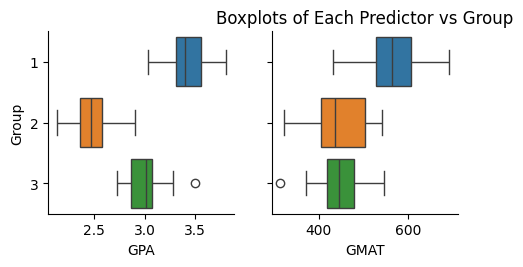

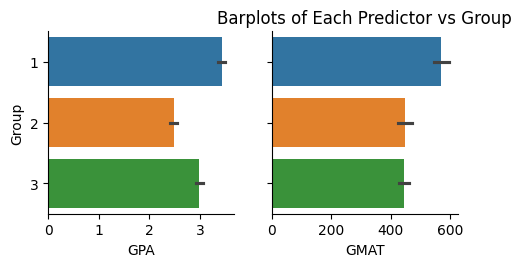

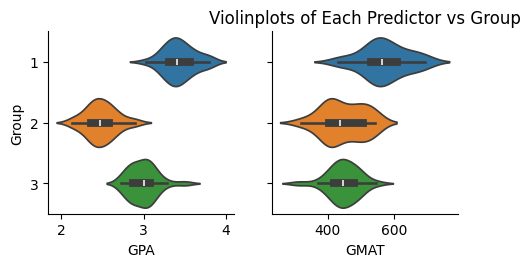

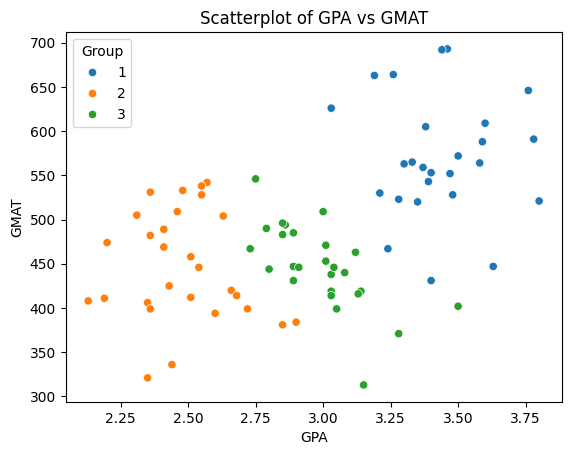

In [97]:
# make Group into factor variable
admin_train.iloc[:,-1] = admin_train.iloc[:,-1].astype('category')

# boxplots to visualize the relationship between the predictors and groups
sns.PairGrid(admin_train, y_vars=['Group'], hue='Group').map(sns.boxplot)
plt.title('Boxplots of Each Predictor vs Group')
plt.show()

# barplots to visualize the relationship between the predictors and groups
sns.PairGrid(admin_train, y_vars=['Group'], hue='Group').map(sns.barplot)
plt.title('Barplots of Each Predictor vs Group')
plt.show()

# violinplots to visualize the relationship between the predictors and groups
sns.PairGrid(admin_train, y_vars=['Group'], hue='Group').map(sns.violinplot)
plt.title('Violinplots of Each Predictor vs Group')
plt.show()

# scatterplot to visualize the relationship between GPA & GMAT coded by Groups
sns.scatterplot(x='GPA', y='GMAT', data=admin_train, hue='Group')
plt.title('Scatterplot of GPA vs GMAT')
plt.show()


##### b: LDA Model for Admission Dataset


In [98]:
# fitting the LDA model
admin_lda = LDA()
admin_lda.fit(admin_train_xnp, admin_train_ynp)

# predict the training data and test data
admin_lda_train = admin_lda.predict(admin_train_xnp)
admin_lda_test = admin_lda.predict(admin_test_xnp)

# confusion matrix based on training & test data
admin_lda_matrix = confusion_matrix(admin_train_ynp, admin_lda_train)
admin_lda_test_matrix = confusion_matrix(admin_test_ynp, admin_lda_test)
print("Confusion matrix for training data")
print(admin_lda_matrix)
print("Confusion matrix for test data")
print(admin_lda_test_matrix)

# misclassification error based on training & test data
admin_lda_misclassification_rate = 1 - accuracy_score(admin_train_ynp, admin_lda_train)
admin_lda_test_misclassification_rate = 1 - accuracy_score(admin_test_ynp, admin_lda_test)
print("Misclassification error rate for training data")
print(admin_lda_misclassification_rate)
print("Misclassification error rate for test data")
print(admin_lda_test_misclassification_rate)



Confusion matrix for training data
[[24  0  2]
 [ 0 26  2]
 [ 0  0 26]]
Confusion matrix for test data
[[2 3]
 [0 0]]
Misclassification error rate for training data
0.050000000000000044
Misclassification error rate for test data
0.6


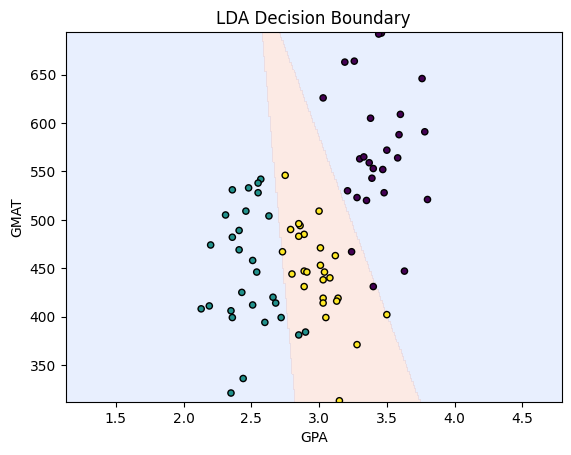

In [99]:
# Plot training data and decision boundary
plt.figure()
# Create a meshgrid of points to evaluate the decision boundary
x_min, x_max = admin_train_xnp[:, 0].min() - 1, admin_train_xnp[:, 0].max() + 1
y_min, y_max = admin_train_xnp[:, 1].min() - 1, admin_train_xnp[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Use the model to predict class labels for each point in the meshgrid
Z = admin_lda.predict(np.c_[xx.ravel(), yy.ravel()])


# Reshape the prediction to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, levels=np.unique(Z), cmap='coolwarm')
plt.scatter(admin_train_xnp[:, 0], admin_train_xnp[:, 1], c=admin_train_ynp, edgecolor='k', s=20)
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("LDA Decision Boundary")
plt.show()

##### d: QDA Model for Admission Dataset

In [100]:
# fitting the QDA model
admin_qda = QDA()
admin_qda.fit(admin_train_xnp, admin_train_ynp)

# predict the training data and test data
admin_qda_train = admin_qda.predict(admin_train_xnp)
admin_qda_test = admin_qda.predict(admin_test_xnp)

# confusion matrix based on training & test data
admin_qda_matrix = confusion_matrix(admin_train_ynp, admin_qda_train)
admin_qda_test_matrix = confusion_matrix(admin_test_ynp, admin_qda_test)
print("Confusion matrix for training data")
print(admin_qda_matrix)
print("Confusion matrix for test data")
print(admin_qda_test_matrix)

# misclassification error based on training & test data
admin_qda_misclassification_rate = 1 - accuracy_score(admin_train_ynp, admin_qda_train)
admin_qda_test_misclassification_rate = 1 - accuracy_score(admin_test_ynp, admin_qda_test)
print("Misclassification error rate for training data")
print(admin_qda_misclassification_rate)
print("Misclassification error rate for test data")
print(admin_qda_test_misclassification_rate)


Confusion matrix for training data
[[26  0  0]
 [ 0 27  1]
 [ 1  0 25]]
Confusion matrix for test data
[[4 1]
 [0 0]]
Misclassification error rate for training data
0.025000000000000022
Misclassification error rate for test data
0.19999999999999996
